In [3]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from mtcnn.mtcnn import MTCNN

model = load_model('facenet_keras.h5')

In [6]:
def extract_face_and_get_embedding(filename, required_size, model):
    
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    face = pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    image = image.resize(required_size)
    
    face_array = np.asarray(image)
    face_pixels = face_array.astype('float32')
    
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    
    samples = np.expand_dims(face_pixels, axis=0)
    
    yhat = model.predict(samples)
    
    return yhat[0]

In [13]:
database = {}
database["Osama"] = extract_face_and_get_embedding('images/1_a.jpg', (160, 160), model)
database["Daud"] = extract_face_and_get_embedding('images/2_a.jpg', (160, 160), model)
database["Haafeez Saeed"] = extract_face_and_get_embedding('images/3_a.jpg', (160, 160), model)
database["Bagdadi"] = extract_face_and_get_embedding('images/4_a.jpg', (160, 160), model)

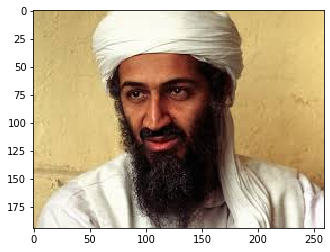

In [39]:
plt.imshow(cv2.cvtColor(cv2.imread('images/1_a.jpg'), cv2.COLOR_BGR2RGB))

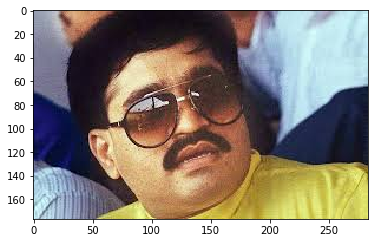

In [40]:
plt.imshow(cv2.cvtColor(cv2.imread('images/2_a.jpg'), cv2.COLOR_BGR2RGB))

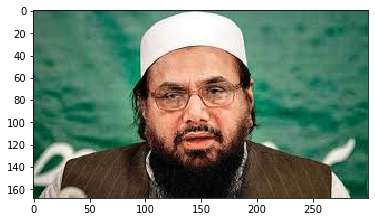

In [41]:
plt.imshow(cv2.cvtColor(cv2.imread('images/3_a.jpg'), cv2.COLOR_BGR2RGB))

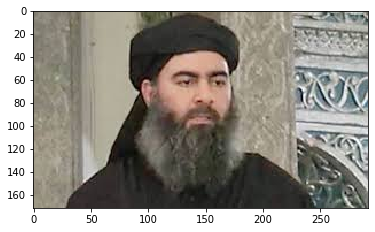

In [42]:
plt.imshow(cv2.cvtColor(cv2.imread('images/4_a.jpg'), cv2.COLOR_BGR2RGB))

In [43]:
def who_it_is(path_of_image, database, model):

    encoding = extract_face_and_get_embedding(path_of_image, (160, 160), model)
    
    min_dist = 100
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(db_enc - encoding)
        if dist < min_dist:
            min_dist = dist
            identity = name

    print ("The best fit for the image found is " + str(identity) + ", with similarity " + str(min_dist))
        
    return min_dist, identity

In [44]:
who_it_is('images/4_b.jpg', database, model)

The best fit for the image found is Bagdadi, with similarity 10.041592


(10.041592, 'Bagdadi')

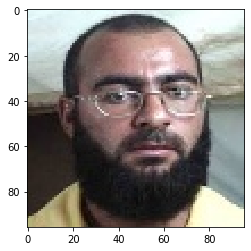

In [45]:
plt.imshow(cv2.cvtColor(cv2.imread('images/4_b.jpg'), cv2.COLOR_BGR2RGB))